In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
image_path = r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\ORIGA\Images\001.jpg"
image = Image.open(image_path)

# Load the segmentation mask
mask_path = r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\ORIGA\Masks\001.png"
mask = Image.open(mask_path).convert("L")  # Convert to grayscale

# Convert images to numpy arrays for plotting and manipulation
image_np = np.array(image)
mask_np = np.array(mask)

# Normalize the mask to [0, 1] range for better visualization
mask_np_normalized = mask_np / 255.0

# Create an overlay by blending the original image and the mask
# Overlay the mask onto the image by giving it a color (e.g., red) where the mask exists
overlay = image_np.copy()
overlay[mask_np > 0] = [255, 0, 0]  # Change the pixel to red where mask is present

# Plot the original image, segmentation mask, and the overlay
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image_np)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(mask_np, cmap='gray')
axes[1].set_title('Segmentation Mask')
axes[1].axis('off')

axes[2].imshow(overlay)
axes[2].set_title('Image with Mask Overlay')
axes[2].axis('off')

plt.tight_layout()
plt.show()


In [3]:
from dictionaries import VESSEL_DATASET_DICT, DISC_DATASET_DICT
from dataloader import get_dataset

seg_type = 'cup'
num_pos_points = 5
num_neg_points = 1
region_type = 'density'


In [4]:
dataset_dict = {}
for name in DISC_DATASET_DICT.keys():
    if name.lower() != 'idrid':
        dataset_dict[name.lower()] = get_dataset(dataset_name = name.lower(), mode='test', seg_type=seg_type, transform=None, color_transform=None,
                                num_pos_points = num_pos_points, num_neg_points = num_neg_points, num_boxes = 1, 
                                region=region_type, random_state=0)


In [7]:
from tqdm import tqdm

for dataset_name, dataset_dataset in tqdm(dataset_dict.items(), desc="Dataset Progress.."):
    for idx in tqdm(range(len(dataset_dataset)), desc="Eval Progress..", unit="data"):
        images, masks, pos_points, neg_points, boxes, num_masks = dataset_dataset[idx]

Dataset Progress..: 100%|██████████| 6/6 [02:13<00:00, 22.19s/it]


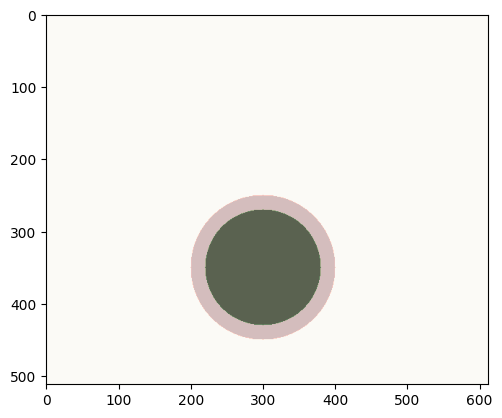

In [12]:
plt.imshow(mask1, cmap='Reds', alpha=0.5)
plt.imshow(mask2, cmap='Greens', alpha=0.5)
plt.show()


In [13]:
from utils.eval_metrics import SegmentationEVAL

seval = SegmentationEVAL()

In [14]:
metrics = seval.get_eval(mask1.astype(np.float32()),mask2)

In [15]:
metrics

{'iou': 0.6391762421618868,
 'auc': 0.9806726385531076,
 'dice': 0.779874946599868,
 'hd95': 20.248456731316587,
 'f1': 0.779874946599868,
 'accuracy': 0.9638225081699346,
 'sensitivity': 1.0,
 'precision': 0.6391762421618868,
 'mcc': 0.7838807700414832,
 'boundary_iou': 0.0,
 'assd': 4.16227766016838}

In [14]:
from sklearn.metrics import roc_auc_score, f1_score

In [22]:
mask1.flatten().astype(np.int32)

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
np.max(mask1.flatten().astype(np.int32))

255

In [23]:
f1_score(mask1.flatten().astype(np.int32),mask2.flatten().astype(np.int32))

ValueError: pos_label=1 is not a valid label. It should be one of [0, 255]

In [14]:
def binarize_mask(mask):
    if np.max(mask) == 255:
        mask = (mask > 127).astype(np.uint8)
    elif np.max(mask) == 1:
        mask = (mask > 0.5).astype(np.uint8)
        
    return mask

In [17]:
img_path = r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\DRIVE\test\images\01_test.tif"
img = cv2.imread(img_path)[..., ::-1]
mask_path = r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\DRIVE\test\mask\01_test_mask.gif"
mask= cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
# mask = binarize_mask(mask)


In [19]:
from PIL import Image

# Open the GIF file
img = Image.open(mask_path)

In [8]:
import torch

chkpt = torch.load('checkpoints/fundus_vessel_r512_a1024_sam2.ckpt')

C:\Users\Sayan Mandal\AppData\Local\Temp\ipykernel_1822700\2841100763.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  chkpt = torch.load('checkpoints/fundus_vessel_r512_

In [1]:
from tqdm import tqdm
import time

In [7]:
for i in tqdm(list(range(10,20)), total=10, bar_format='{l_bar}{bar} {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}]'):
    time.sleep(2)
    print(i)

 10%|█          1/10 [00:02<00:18,  2.01s/it]

10


 20%|██         2/10 [00:04<00:16,  2.01s/it]

11


 30%|███        3/10 [00:06<00:14,  2.01s/it]

12


 40%|████       4/10 [00:08<00:12,  2.01s/it]

13


 40%|████       4/10 [00:10<00:15,  2.51s/it]


KeyboardInterrupt: 

In [11]:
metrics.get('step',[0])[-1]

10000

In [24]:
masks = gif_to_numpy(mask_path)

In [27]:
Nimgs = 20
channels = 3
height = 584
width = 565
imgs = np.empty((Nimgs,height,width,channels))
groundTruth = np.empty((Nimgs,height,width))
border_masks = np.empty((Nimgs,height,width))

In [ ]:
data_dir = r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\DRIVE"
os.path.join(data_dir,'test')

In [5]:
img_path = r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\CHASEDB1\CHASEDB1\\"
data = []
all_images = glob.glob(img_path+"*.jpg")
for image_path in all_images:
        image_name = Path(image_path).name
        mask1_name = image_name[:-4] + '_1stHO.png'
        mask2_name = image_name[:-4] + '_2ndHO.png'
        if os.path.exists(os.path.join(img_path, mask1_name)) and os.path.exists(os.path.join(img_path, mask2_name)):
            data.append(
                {
                    "image": os.path.join(img_path, image_name),
                    "annotation": [os.path.join(img_path,  mask1_name),
                                   os.path.join(img_path,  mask2_name)]
                }
            )

In [6]:
tr, ts = train_test_split(data, test_size=0.27)

In [1]:
from dataloader.chasedb import CHASEDBDataset

In [4]:
data_dir = r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\CHASEDB1\CHASEDB1"
dataset = CHASEDBDataset(data_dir, dataset_type='train', unified=True, transform=None, num_pos_points=25,num_neg_points=2,  region='density')

In [6]:
from dataloader.drive import DRIVEDataset
data_dir = r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\DRIVE"
dataset = DRIVEDataset(data_dir, dataset_type='test', unified=False, transform=None, num_neg_points=0, num_pos_points=1, num_boxes=0,region='density')


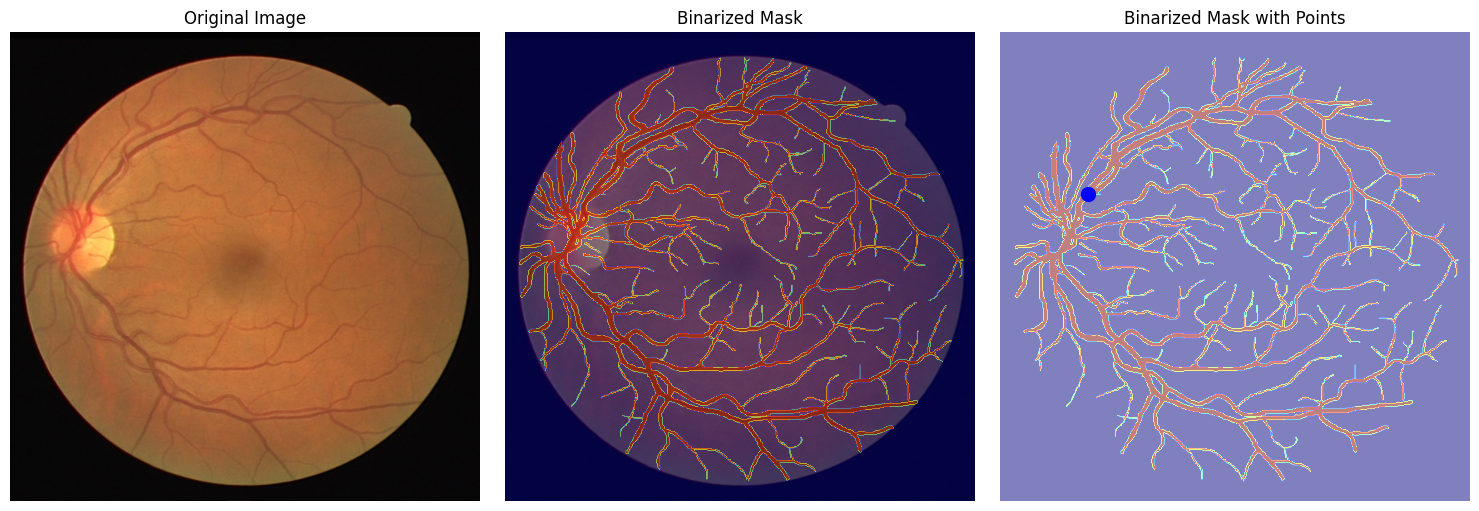

In [ ]:
img, mask, pos, neg, box, nump = dataset[5]
dataset.visualize_data(img, mask, pos, neg, box)

In [3]:
batch_iter = dataset.get_batches(batch_size=4)

In [4]:
images, masks, pos, neg,box, num=next(batch_iter)

In [6]:
import numpy as np

In [8]:
np.array(box).shape

(4, 0)

In [12]:
np.array(box)[0]

In [3]:
from dataloader.fives import FIVESDataset
data_dir = r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\FIVES"
dataset = FIVESDataset(data_dir, dataset_type='test', unified=False, transform=None,num_neg_points=2, num_pos_points=50)

In [1]:
from dataloader.hrf import HRFDataset
data_dir = r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\HRF"
dataset = HRFDataset(data_dir, dataset_type='train', unified=False, transform=None)

In [1]:
from dataloader.stare import STAREDataset
data_dir = r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\STARE"
dataset = STAREDataset(data_dir, dataset_type='train', unified=False, transform=None)

In [1]:
from dataloader.drishtigs import DRISHTIGSDataset
data_dir = r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\DRISHTI-GS"
dataset = DRISHTIGSDataset(data_dir, dataset_type='train', unified=False, transform=None, seg_type='cup')

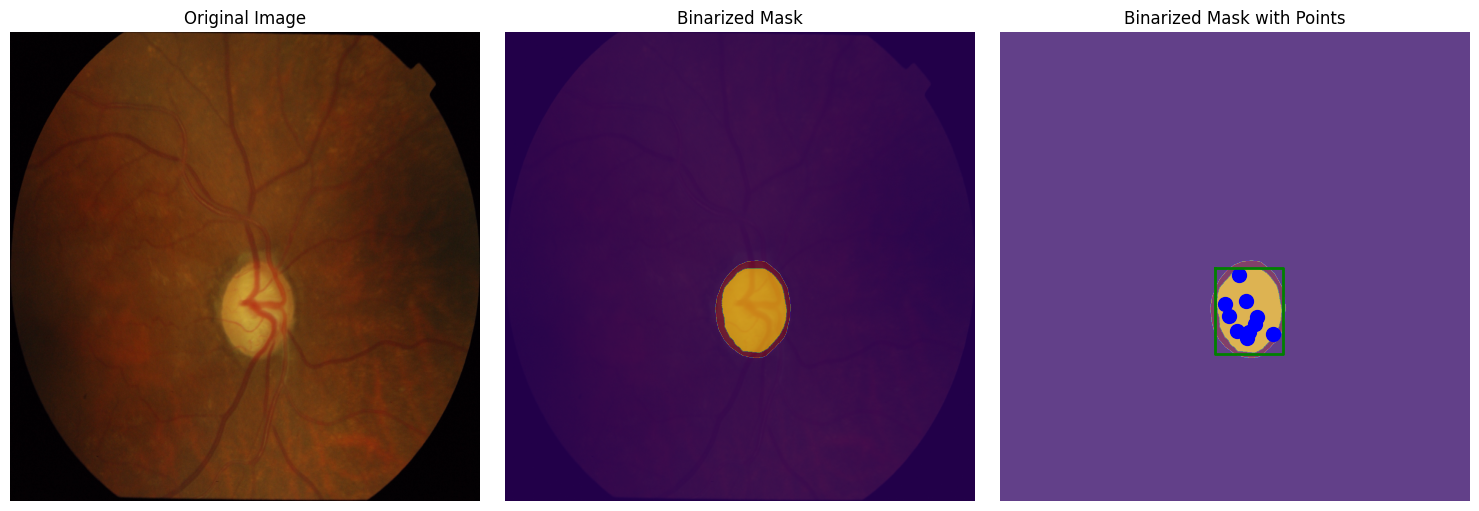

In [2]:
img, mask, pos, neg, box, nump = dataset[3]
dataset.visualize_data(img, mask, pos, neg, box)

In [3]:
from dataloader.g1020 import G1020Dataset
data_dir = r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\G1020"
dataset = G1020Dataset(data_dir, dataset_type='train', unified=False, transform=None, seg_type='cup')

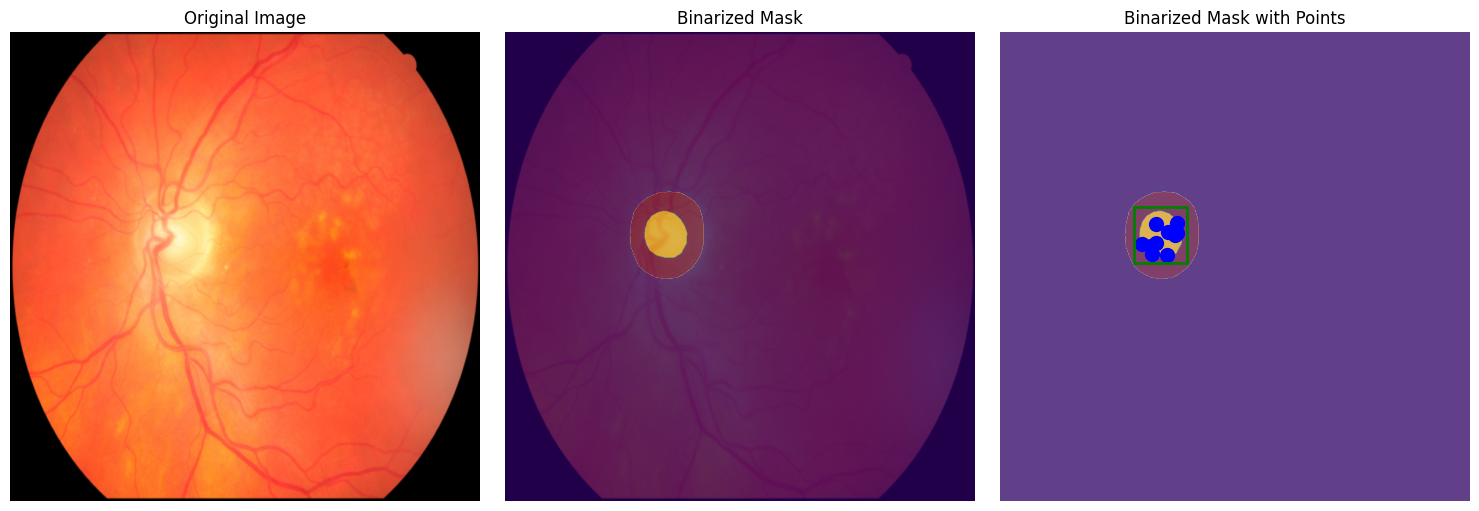

In [4]:
img, mask, pos, neg, box, nump = dataset[3]
dataset.visualize_data(img, mask, pos, neg, box)

In [5]:
from dataloader.grape import GRAPEDataset

data_dir = r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\GRAPE"
dataset = GRAPEDataset(data_dir, dataset_type='train', unified=False, transform=None, seg_type='cup_only')

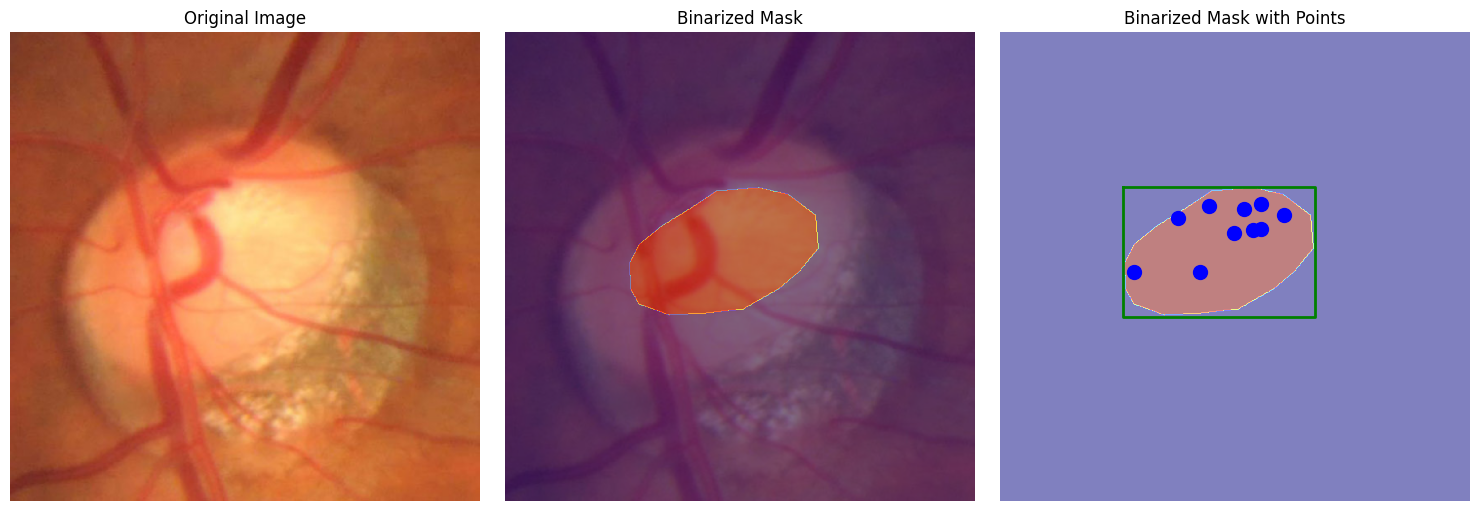

In [6]:
img, mask, pos, neg, box, nump = dataset[5]
dataset.visualize_data(img, mask, pos, neg, box)

In [9]:
from dataloader.idrid import IDRIDDataset


data_dir = r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\IDRID\Segmentation"
dataset = IDRIDDataset(data_dir, dataset_type='train', unified=False, transform=None, seg_type='he')

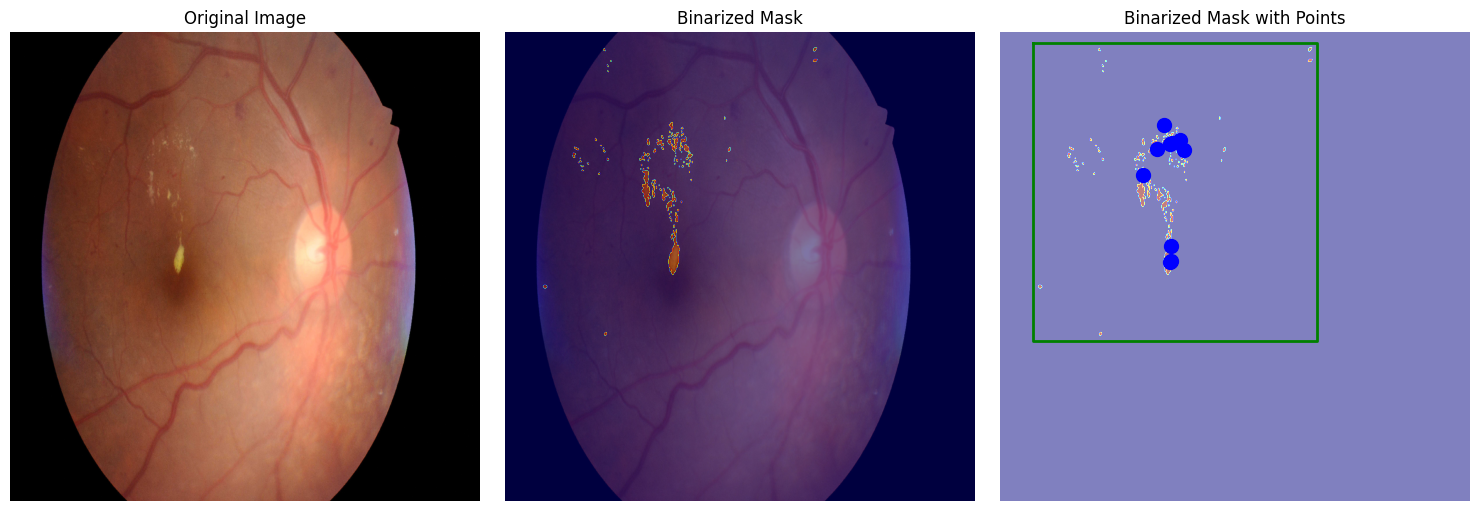

In [10]:
img, mask, pos, neg, box, nump = dataset[5]
dataset.visualize_data(img, mask, pos, neg, box)

In [11]:
from dataloader.origa import ORIGADataset

data_dir = r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\ORIGA"
dataset = ORIGADataset(data_dir, dataset_type='train', unified=False, transform=None, seg_type='cup')

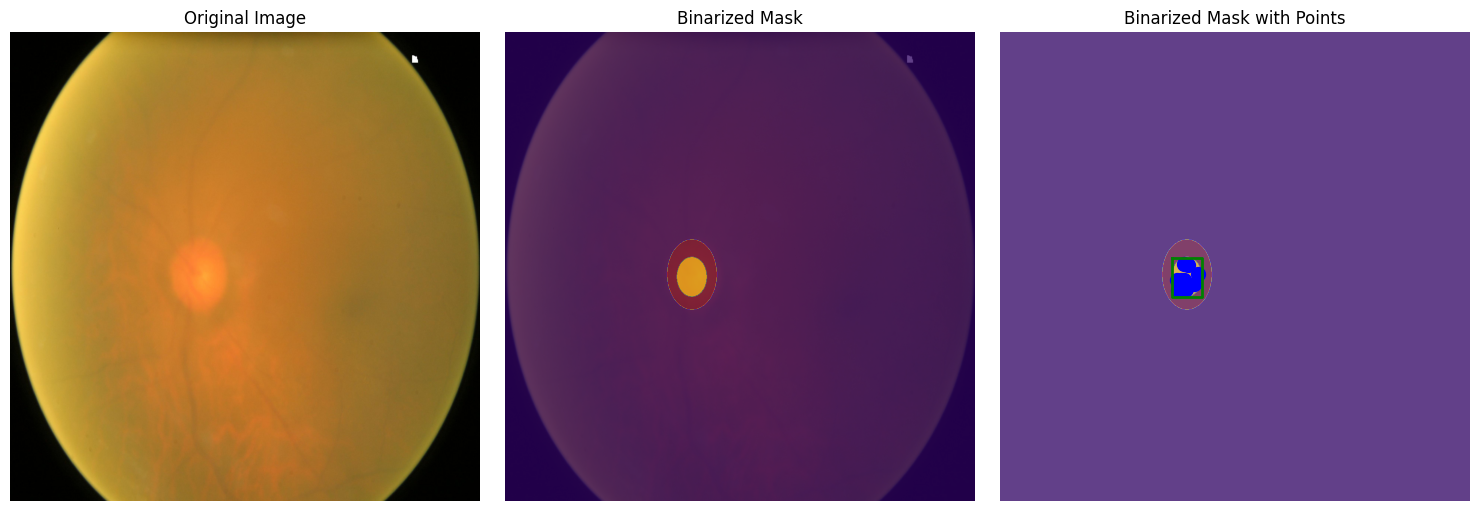

In [12]:
img, mask, pos, neg, box, nump = dataset[5]
dataset.visualize_data(img, mask, pos, neg, box)

In [13]:
from dataloader.papiladb import PAPILADBDataset

data_dir = r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\PapilaDB"
dataset = PAPILADBDataset(data_dir, dataset_type='train', unified=False, transform=None, seg_type='cup')

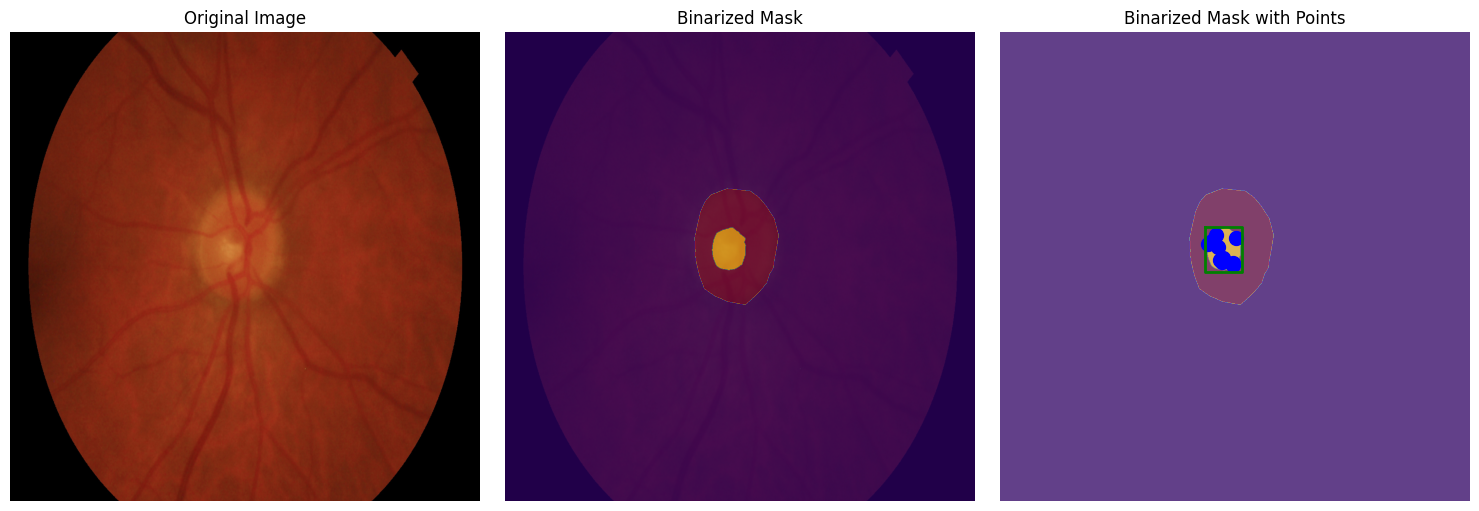

In [14]:
img, mask, pos, neg, box, nump = dataset[5]
dataset.visualize_data(img, mask, pos, neg, box)

In [15]:
from dataloader.refuge2 import REFUGE2Dataset    
data_dir = r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\REFUGE2"
dataset = REFUGE2Dataset(data_dir, dataset_type='train', unified=False, transform=None, seg_type='cup')

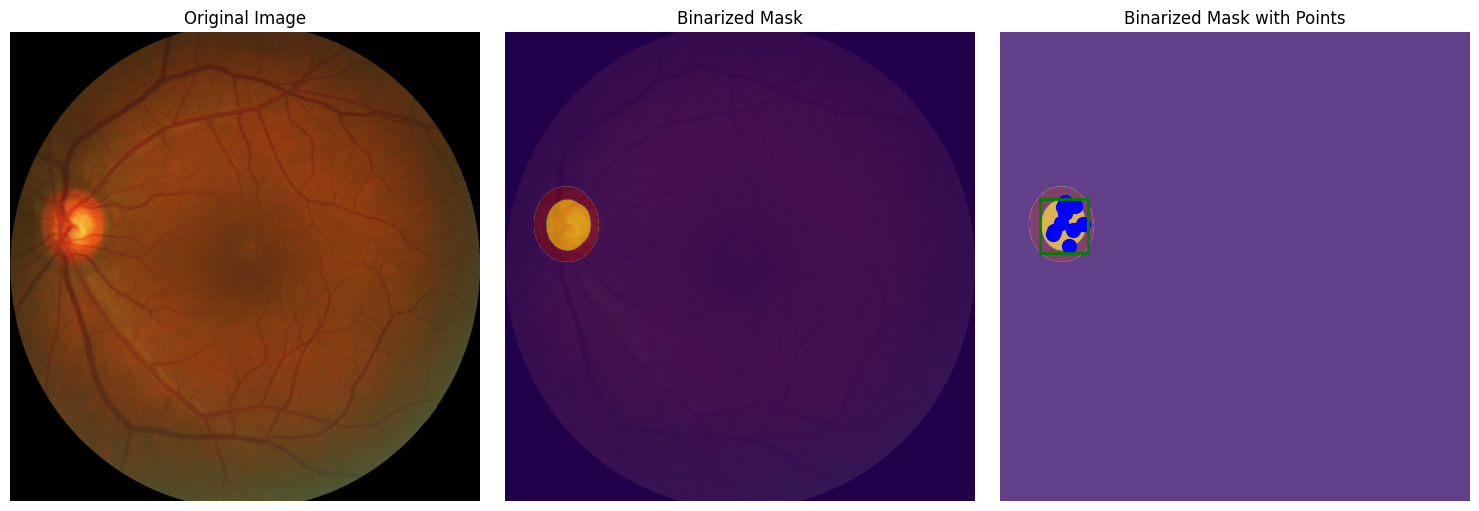

In [16]:
img, mask, pos, neg, box, nump = dataset[10]
dataset.visualize_data(img, mask, pos, neg, box)

In [1]:
from dataloader.retina_datasets import  get_dataset, generate_sequential_batches
from itertools import cycle

In [2]:
dataset1 = get_dataset(dataset_name='fives', num_pos_points=100)
dataset2 = get_dataset(dataset_name='hrf', num_pos_points=100)
dataset3 = get_dataset(dataset_name='stare', num_pos_points=100)


In [15]:
from dictionaries import VESSEL_DATASET_DICT, DISC_DATASET_DICT

In [16]:
[k.lower() for k in DISC_DATASET_DICT.keys()]

['drishtigs', 'g1020', 'grape', 'idrid', 'origa', 'papiladb', 'refuge2']

In [4]:
cyclic_shuffled_batches = generate_sequential_batches(
        datasets=[dataset2, dataset3,dataset1],
        batch_size=8
    )

In [9]:
all_images, all_masks, all_pos_points, all_neg_points, all_boxes, all_num_masks, idx = next(cyclic_shuffled_batches)

In [1]:
from dataloader.retina_datasets import get_batched_dataset, get_dataset
from itertools import  cycle
import torchvision.transforms as transforms
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # Always apply with 50% probability
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomApply([     
        transforms.RandomPerspective(distortion_scale=0.1, p=0.5),
        transforms.RandomResizedCrop(size=(1000, 1000)),
        transforms.RandomRotation(degrees=8),   # Random rotation between -30 to 30 degrees
        transforms.RandomAffine(degrees=8, translate=(0.2, 0.2), scale=(0.2, 0.8)),  # Random affine transform
    ], p=0.5),  # Probability to apply the list of transformations
])

color_transform = transforms.Compose([
    transforms.RandomApply([     
        transforms.ColorJitter(brightness=.1, hue=.02),
        transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 0.6)),
        transforms.RandomAdjustSharpness(sharpness_factor=1.2),
    ], p=0.5),  # Probability to apply the list of transformations
])
data_batch_size = 8
batch_iter = cycle(get_batched_dataset(dataset_type = 'vessel', batch_size= 8, mode='train', seg_type = 'od',transform=transform, color_transform=color_transform,
                 num_pos_points = 200, num_neg_points = 0, num_boxes = 1, region='general', random_state=0))

In [2]:
for x in range(10):
    images, masks, pos_points, neg_points, boxes, num_masks = next(batch_iter)
    print(x, len(images), len(pos_points), len(masks))

0 8 8 8
1 8 8 8
2 8 8 8
3 8 8 8
4 8 8 8
5 8 8 8
6 8 8 8
7 8 8 8
8 8 8 8
9 8 8 8


In [5]:
num_masks

[201, 201, 201, 201, 201, 201, 201, 201]

In [14]:
dataset_iterators = [cycle(ds.get_batches(batch_size=batch_size, dataset_type='train')) for ds in datasets]

dataset_lengths = [len(ds) for ds in datasets]
max_len = max(dataset_lengths)
num_batches_per_dataset = [(max_len + ds_len - 1) // ds_len for ds_len in dataset_lengths]

In [18]:
combined_batches = []
for iterator, num_batches in zip(dataset_iterators, num_batches_per_dataset):
    for _ in range(num_batches):
        batch = next(iterator)
        combined_batches.append(batch)

In [22]:
num_batches_per_dataset

[1, 19, 40]

In [21]:
len(combined_batches)

60

In [6]:
from dataloader import G1020Dataset
data_dir = r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\G1020"
dataset = G1020Dataset(data_dir, dataset_type='train', unified=False, transform=None, seg_type='rim')

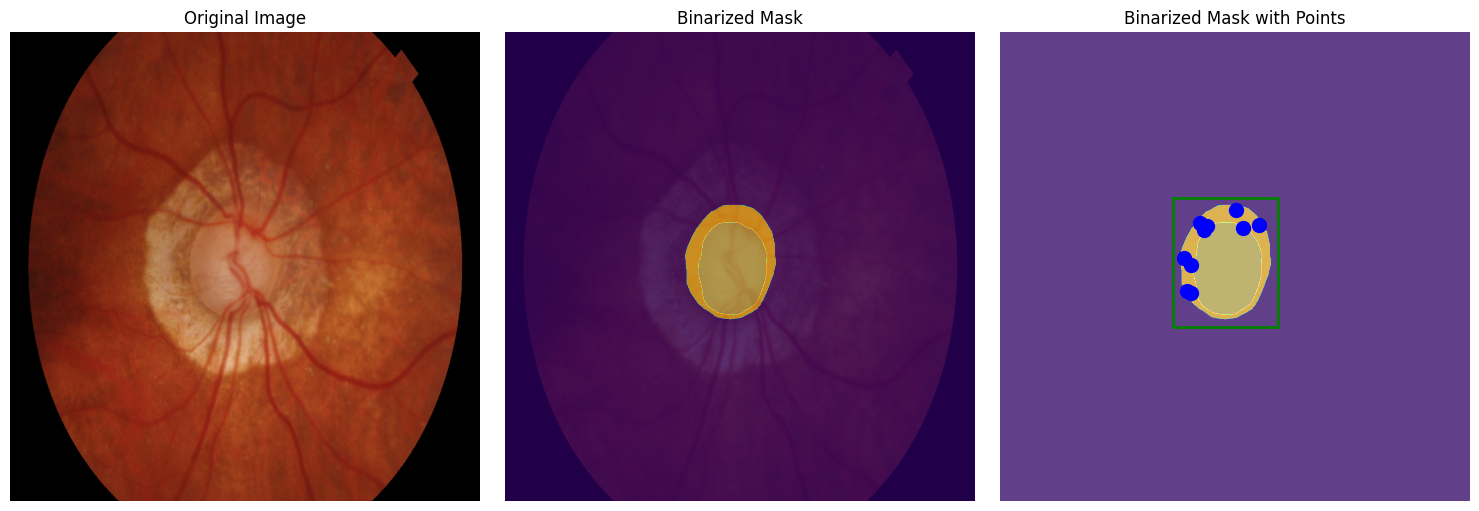

In [ ]:
img, mask, pos, neg, box, nump = dataset[10]
dataset.visualize_data(img, mask, pos, neg, box)

In [3]:
img, mask, pos, neg, box, nump = dataset[0]

ValueError: zero-size array to reduction operation minimum which has no identity

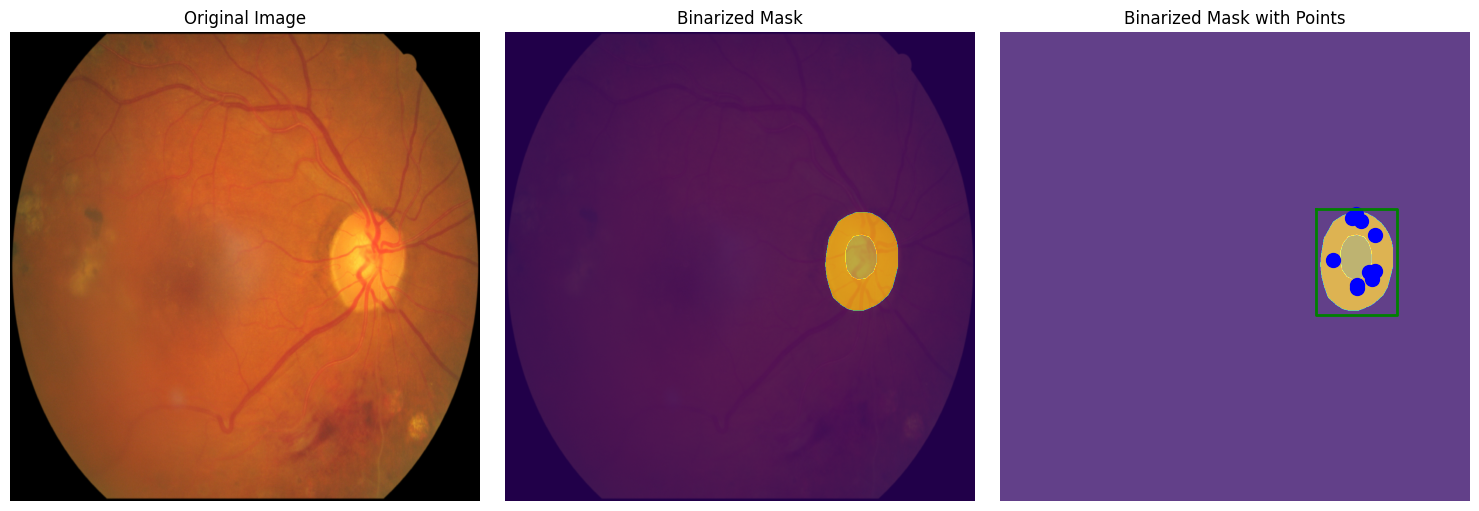

In [12]:
dataset.visualize_data(img, mask, pos, neg, box)

In [9]:

import scipy.io
mat = scipy.io.loadmat(r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\ORIGA\Semi-automatic-annotations\001.mat")

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
mask = cv2.imread(r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\REFUGE2\train\mask\g0001.bmp", cv2.IMREAD_GRAYSCALE)

In [6]:
np.unique(mask)

array([  0, 128, 255], dtype=uint8)

In [12]:
np.logical_or((mask==0).astype(np.uint8),(mask==1).astype(np.uint8))

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

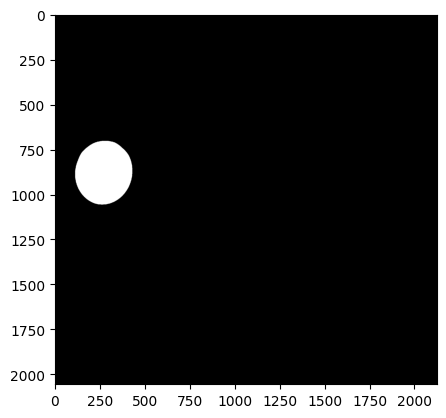

In [14]:
plt.imshow(np.logical_or((mask==0).astype(np.uint8),(mask==128).astype(np.uint8)), cmap='gray')

In [11]:
import numpy as np
np.unique(mat['mask'])

array([0, 1, 2], dtype=uint8)

In [1]:
from dataloader.drishtigs import DRISHTIGSDataset

In [2]:
data_dir = r"C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\DRISHTI-GS"
dataset = DRISHTIGSDataset(data_dir, dataset_type='train', unified=False, transform=None)

In [ ]:
dataset.data

In [20]:
imgs = glob.glob(os.path.join(data_dir, "Images", "**","*.png"), recursive=True)

In [8]:
img = cv2.imread(dataset.data[0]['image'])[..., ::-1]

In [9]:
w,h, _ = img.shape

In [27]:
width, height,_ = img.shape

img_temp = Image.new('L', (width, height), 0)
ImageDraw.Draw(img_temp).polygon(polygon, outline=1, fill=1)

In [30]:
mask = np.array(img_temp)


In [ ]:
mask

In [4]:
from PIL import Image, ImageDraw
import numpy as np
import cv2

In [13]:
fp = open(dataset.data[0]['annotation'][0], 'r').readlines()

In [25]:
polygon = [f.strip().split(' ') for f in fp]
polygon = [tuple([int(x) for x in sublist]) for sublist in polygon]

In [ ]:
polygon

In [14]:
allsets = r"""CHASEDB1 C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\CHASEDB1\CHASEDB1
DRIVE C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\DRIVE
FIVES C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\FIVES
HRF C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\HRF
STARE C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\STARE
DRISHTIGS C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\DRISHTI-GS
G1020 C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\G1020
GRAPE C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\GRAPE
IDRID C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\IDRID\Segmentation
ORIGA C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\ORIGA
PAPILADB C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\PapilaDB
REFUGE2 C:\Users\Sayan Mandal\workspace\datasets\eye_dataset\Fundus\REFUGE2"""

In [19]:
mydict = {a.split(' ', 1)[0]: a.split(' ', 1)[1] for a in allsets.split('\n')}

In [20]:
mydict

{'CHASEDB1': 'C:\\Users\\Sayan Mandal\\workspace\\datasets\\eye_dataset\\Fundus\\CHASEDB1\\CHASEDB1',
 'DRIVE': 'C:\\Users\\Sayan Mandal\\workspace\\datasets\\eye_dataset\\Fundus\\DRIVE',
 'FIVES': 'C:\\Users\\Sayan Mandal\\workspace\\datasets\\eye_dataset\\Fundus\\FIVES',
 'HRF': 'C:\\Users\\Sayan Mandal\\workspace\\datasets\\eye_dataset\\Fundus\\HRF',
 'STARE': 'C:\\Users\\Sayan Mandal\\workspace\\datasets\\eye_dataset\\Fundus\\STARE',
 'DRISHTIGS': 'C:\\Users\\Sayan Mandal\\workspace\\datasets\\eye_dataset\\Fundus\\DRISHTI-GS',
 'G1020': 'C:\\Users\\Sayan Mandal\\workspace\\datasets\\eye_dataset\\Fundus\\G1020',
 'GRAPE': 'C:\\Users\\Sayan Mandal\\workspace\\datasets\\eye_dataset\\Fundus\\GRAPE',
 'IDRID': 'C:\\Users\\Sayan Mandal\\workspace\\datasets\\eye_dataset\\Fundus\\IDRID\\Segmentation',
 'ORIGA': 'C:\\Users\\Sayan Mandal\\workspace\\datasets\\eye_dataset\\Fundus\\ORIGA',
 'PAPILADB': 'C:\\Users\\Sayan Mandal\\workspace\\datasets\\eye_dataset\\Fundus\\PapilaDB',
 'REFUGE2': '

In [62]:
import numpy as np
import torch
from utils.eval_metrics import SegmentationEVAL
from utils.loss_funcs import FocalTverskyLoss

gt_mask1 = np.random.rand(512,256)
gt_mask = (gt_mask1>0.5).astype(np.uint8)
prd_mask1 = np.random.rand(512,256)
# prd_mask = (prd_mask1>0.5).astype(np.uint8)

seval = SegmentationEVAL()

In [63]:
gt_mask = torch.tensor(gt_mask)
prd_mask = torch.tensor(prd_mask1)

In [64]:
gt_mask = (gt_mask > 0.5).float().unsqueeze(0).unsqueeze(0)
pred_mask = prd_mask.float().unsqueeze(0).unsqueeze(0)

In [65]:
fcloss = FocalTverskyLoss()

In [66]:
fcloss(pred_mask, gt_mask)

tensor(0.5233)

In [57]:
pred_mask.shape

torch.Size([1, 1, 512, 256])

In [58]:
gt_mask = gt_mask.view(gt_mask.size(0), -1)  # Flatten per batch
pred_mask = pred_mask.view(pred_mask.size(0), -1)

In [59]:
intersection = (gt_mask * pred_mask).sum(dim=1)  # Element-wise multiplication and sum over pixels

In [60]:
union = gt_mask.sum(dim=1) + pred_mask.sum(dim=1) - intersection

In [61]:
intersection/union

tensor([0.3297])